# Costumer Churn Prediction

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Load Data

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.shape

(4250, 20)

In [5]:
# mapping 
df['churn'] = df.churn.map({'no': 0, 'yes': 1})
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# EDA Extensive

## Target 

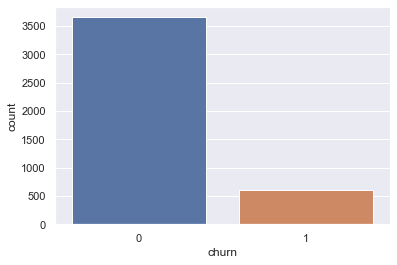

In [6]:
sns.countplot(df.churn);

Gunakan f1 score

## Numeric vs Target 

In [8]:
# filter fitur numerik dan categoric 
numeric = list(df.dtypes[df.dtypes != 'object'].index)
categoric = list(df.dtypes[df.dtypes == 'object'].index)

### Distplot

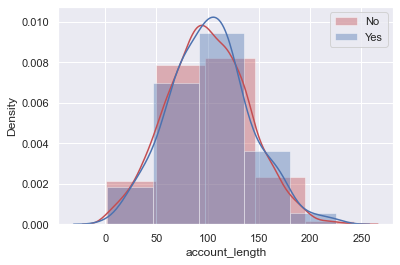

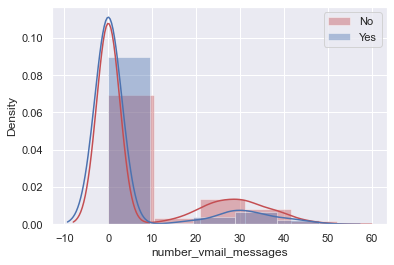

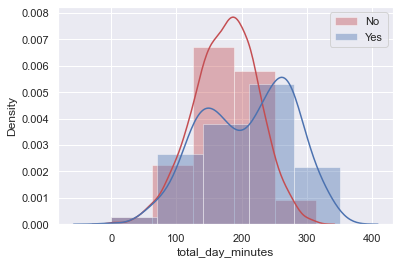

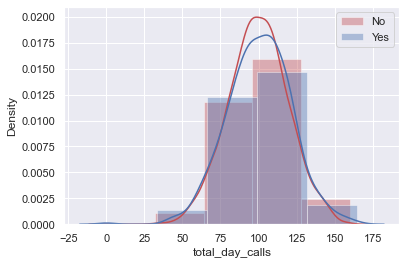

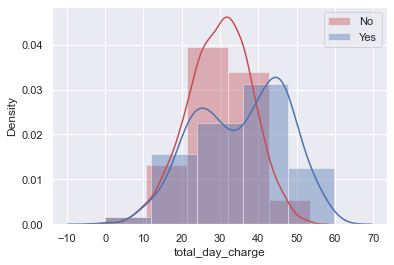

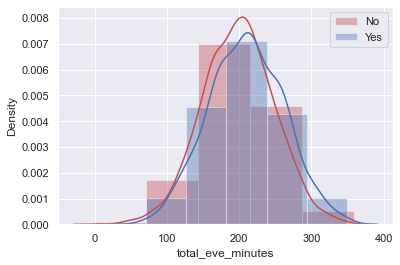

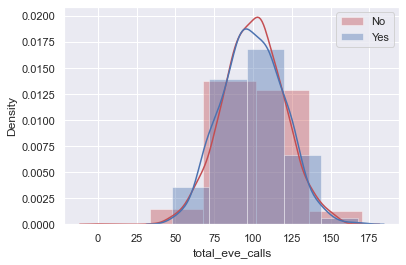

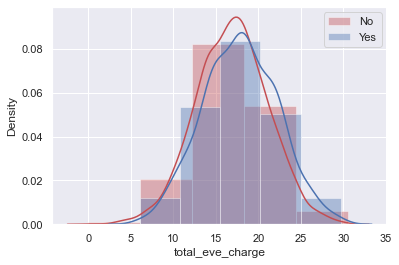

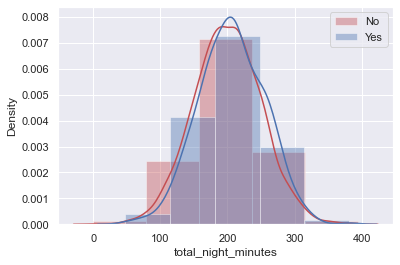

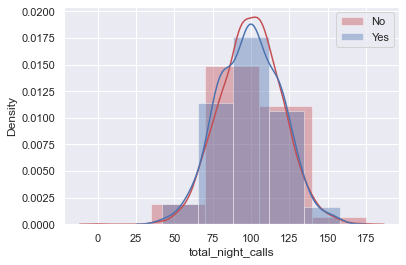

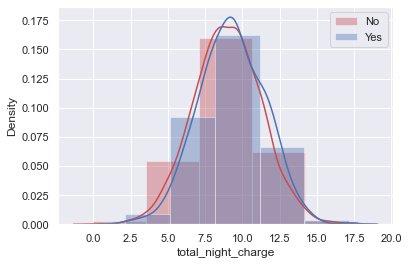

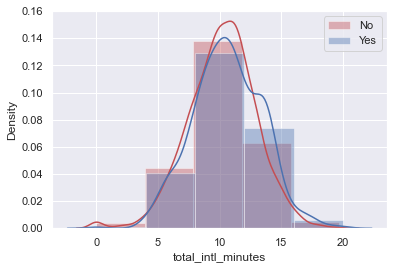

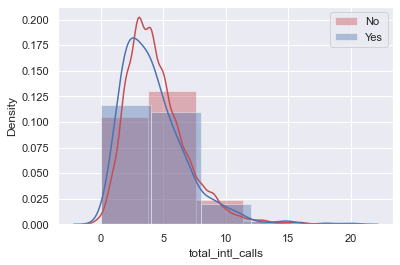

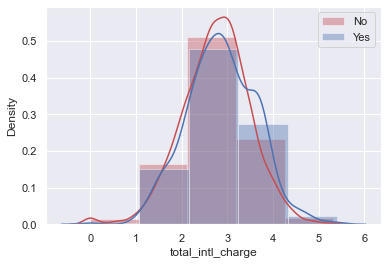

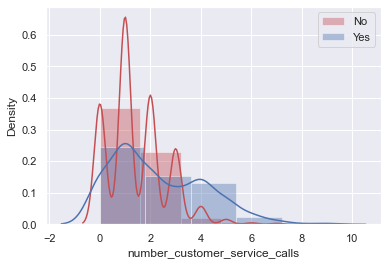

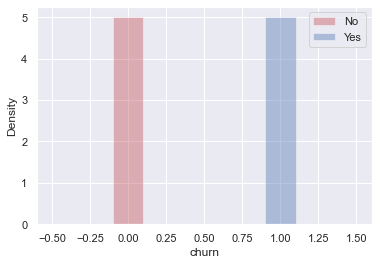

In [10]:
for features in numeric:
    sns.distplot(df[features][df.churn == 0], bins=5, label='No', color='r')
    sns.distplot(df[features][df.churn == 1], bins=5, label='Yes', color='b')
    plt.legend()
    plt.show()

### Boxplot

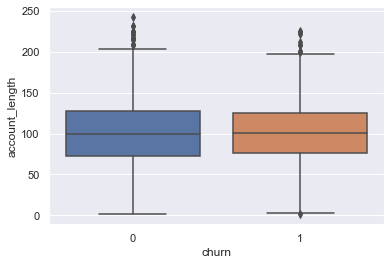

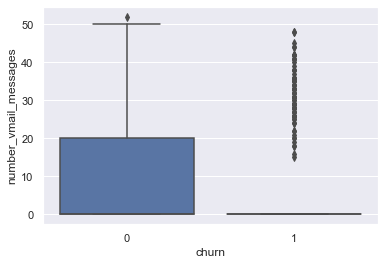

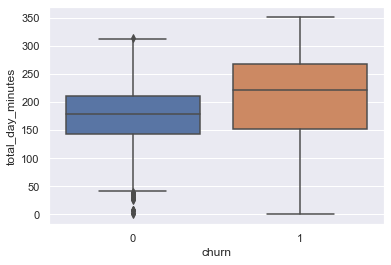

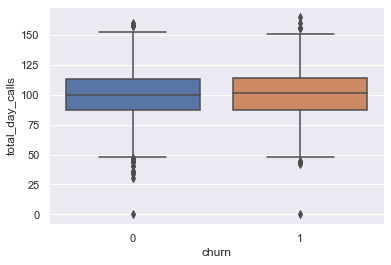

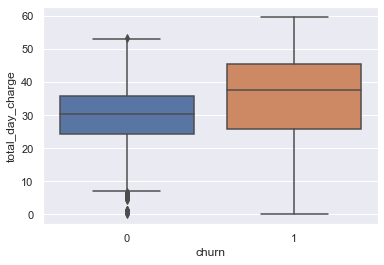

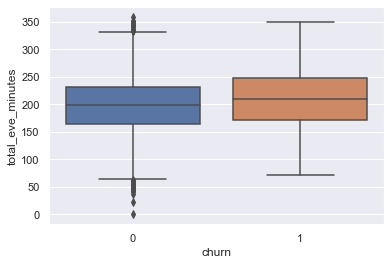

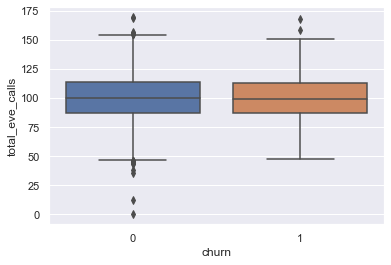

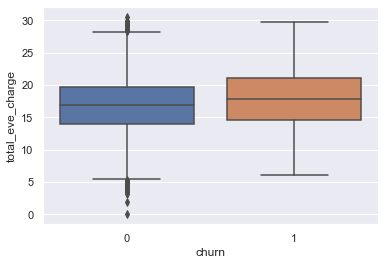

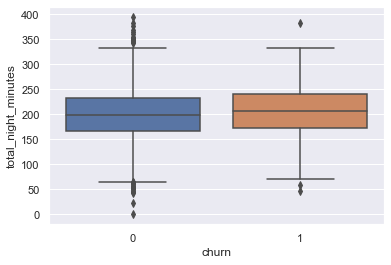

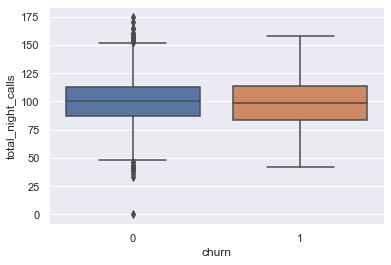

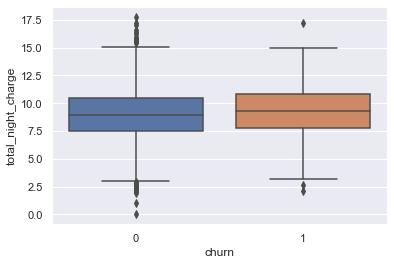

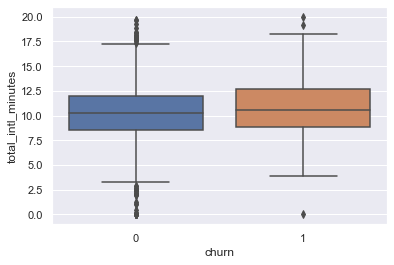

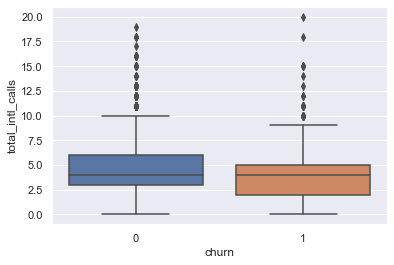

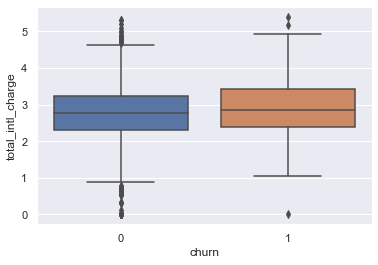

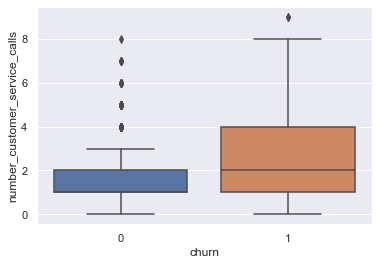

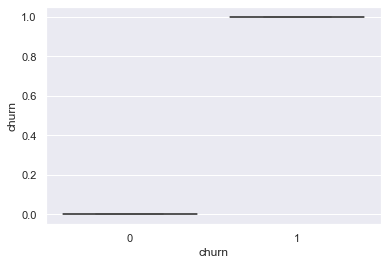

In [11]:
for features in numeric:
    sns.boxplot(x='churn', y=df[features], data=df)
    plt.show()

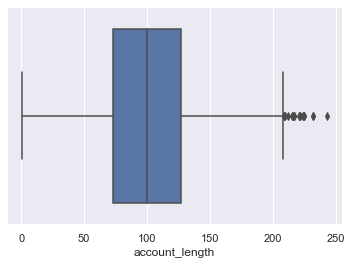

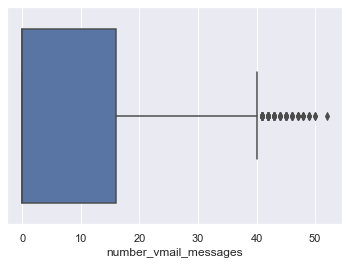

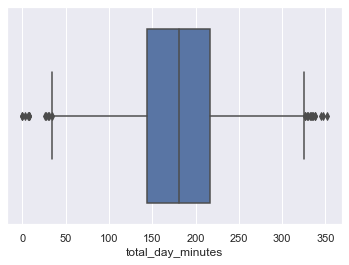

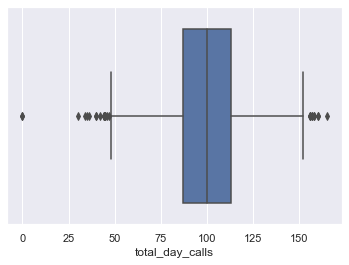

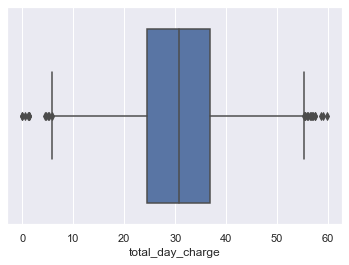

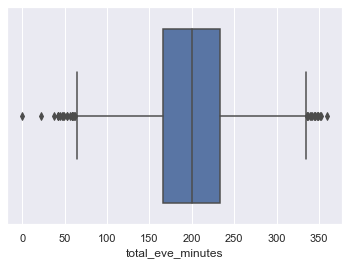

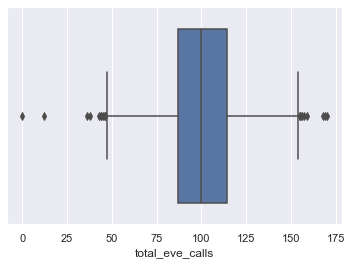

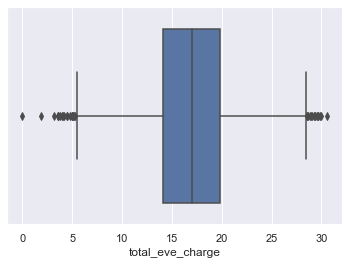

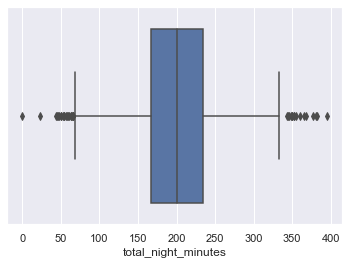

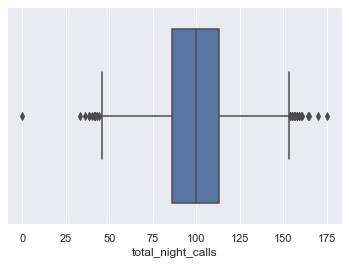

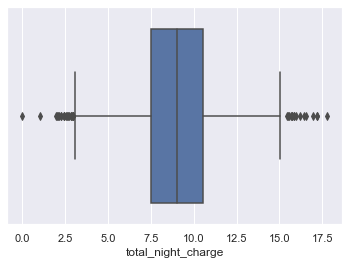

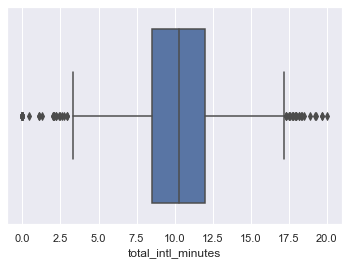

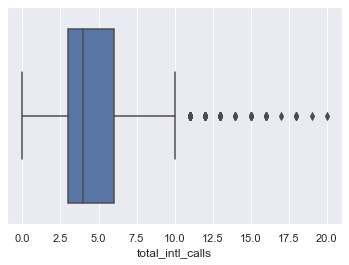

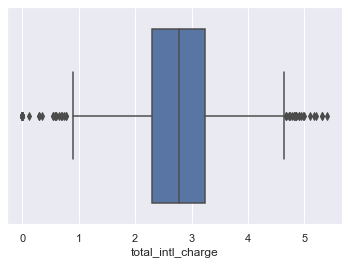

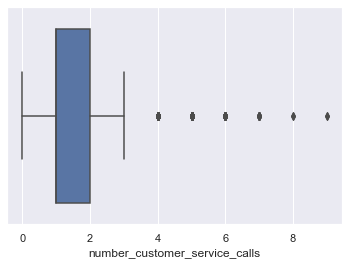

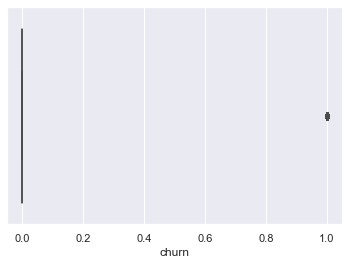

In [12]:
for features in numeric:
    sns.boxplot(df[features], data=df)
    plt.show()

## Categoric vs Target 

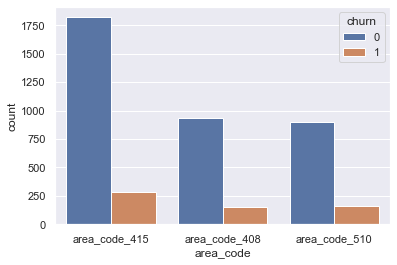

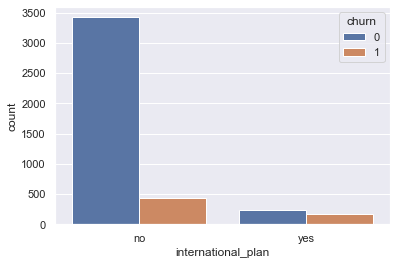

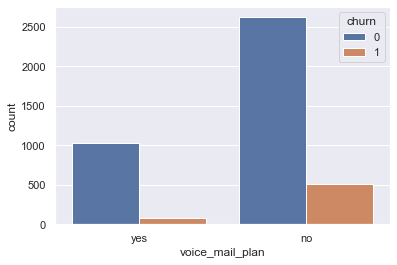

In [24]:
categoric = ['area_code', 'international_plan', 'voice_mail_plan']

for features in categoric:
    sns.countplot(df[features], hue='churn', data=df)
    plt.show()

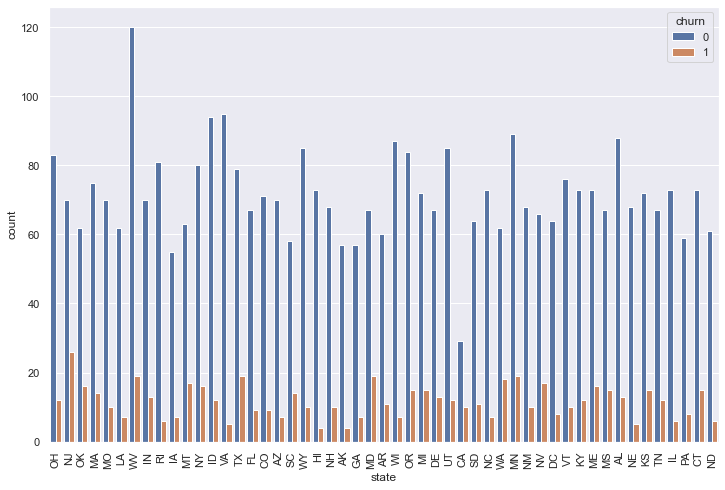

In [35]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(df.state, hue='churn', data=df)
plt.setp(plot.get_xticklabels(), rotation=90);

## Categoric vs Numeric 

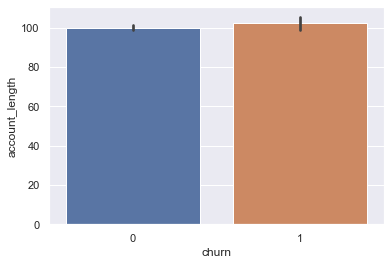

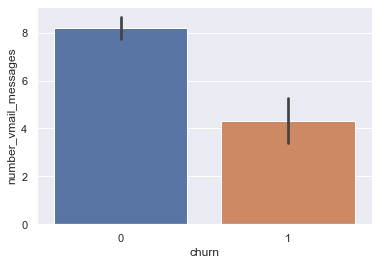

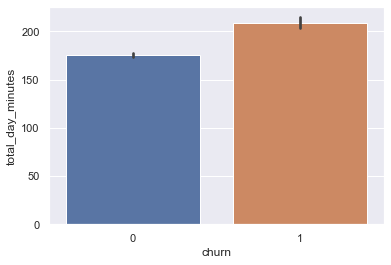

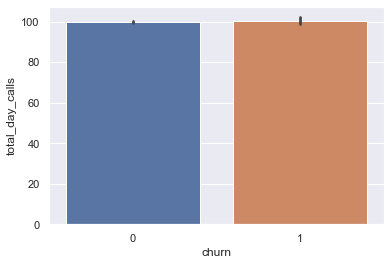

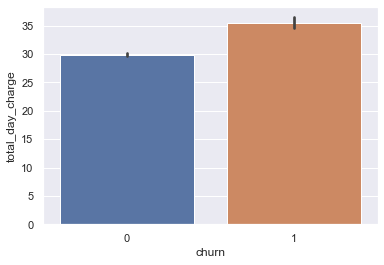

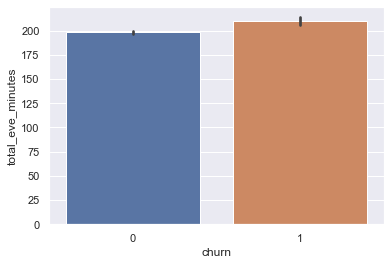

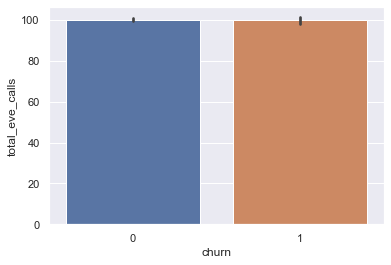

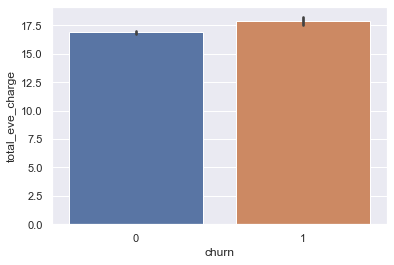

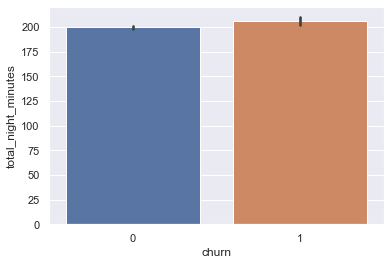

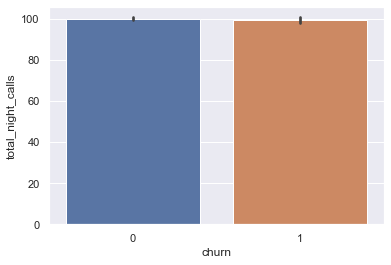

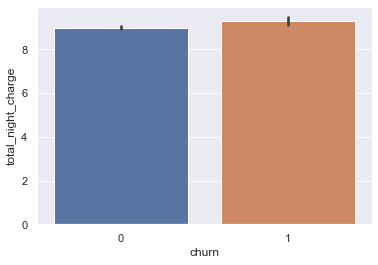

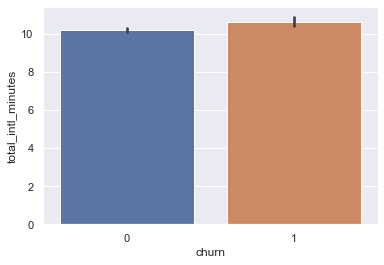

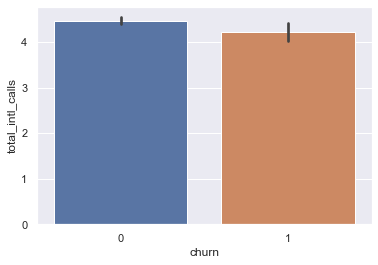

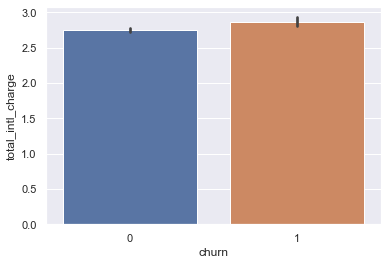

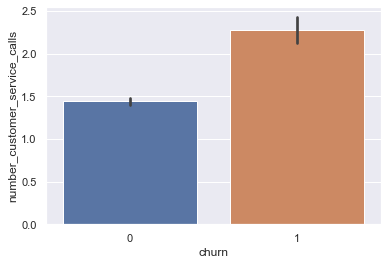

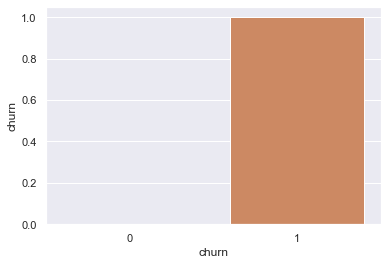

In [36]:
for features in numeric:
    sns.barplot(x='churn', y=df[features], data=df)
    plt.show()

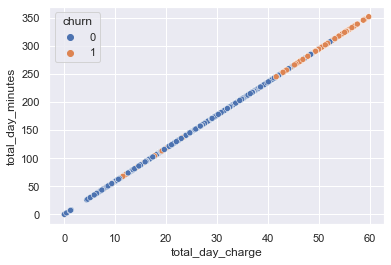

In [39]:
sns.scatterplot(x='total_day_charge', y='total_day_minutes', hue='churn', data=df);

Terjadi korelasi positif sempurna pada kedua variabel maka, harus hapus salah satu variabel.

In [41]:
df.drop(columns='total_day_minutes', axis=1, inplace=True)

In [42]:
df.shape

(4250, 19)

## Correlation

In [46]:
categoric = ['area_code', 'international_plan', 'voice_mail_plan', 'state']

In [47]:
from jcopml.plot import plot_correlation_ratio, plot_association_matrix

In [48]:
plot_association_matrix(df, 'churn', categoric)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

In [53]:
numeric = ['account_length','number_vmail_messages','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes',
           'total_intl_calls','total_intl_charge','number_customer_service_calls']

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,0.000376,0.010069,0.000135,0.046338,0.006218,0.000046,0.006218,0.002176,0.000161,0.002175,0.003045,0.001179,0.003044,0.048938


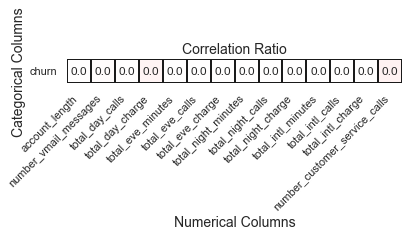

In [55]:
plot_correlation_ratio(df, ['churn'], numeric, report=True)

In [60]:
df.to_csv('data/train_new.csv', index=False)